[[0.1 0.4]
 [0.2 0.2]
 [0.3 0.1]
 [0.4 0.3]]


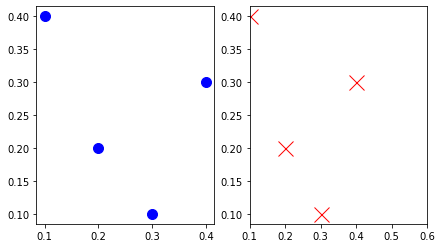

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame([
    {"x":0.1, "y":0.4},
    {"x":0.2, "y":0.2},
    {"x":0.3, "y":0.1},
    {"x":0.4, "y":0.3}
])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 4))
ax2.set_xlim(0.1, 0.6)

points = df[["x", "y"]].values
print(points)

def scatter(ax, points, style="bo", size=10, mark='o', col='blue'):
    for x, y in points:
        ax.plot(x, y, style, markersize=size, marker=mark, color=col)

scatter(ax1, points)
scatter(ax2, points, mark='x', col='r', size=15) # TODO: make large red X's
fig.savefig("good.png", bbox_inches=None)
fig.savefig("bad.png", bbox_inches="tight")

# part 2

In [4]:
from numpy.random import normal
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams["font.size"] = 16

df = pd.DataFrame({
    "X": normal(10, 20, 100),
    "Y": normal(15, 20, 100),
    "Z": normal(5, 5, 100),
}, index=range(0,100)).cumsum()

df

,X,Y,Z
0,43.896538,-7.508898,18.553441
1,49.857988,-34.105577,22.670462
2,60.744750,-28.321697,30.134258
3,53.055903,22.841288,32.770413
4,63.544419,41.925561,37.889531
...,...,...,...
95,1180.276167,1499.657969,414.404083
96,1199.772551,1501.851553,429.216831
97,1191.181682,1517.905303,427.132286
98,1202.186602,1528.782659,433.956968


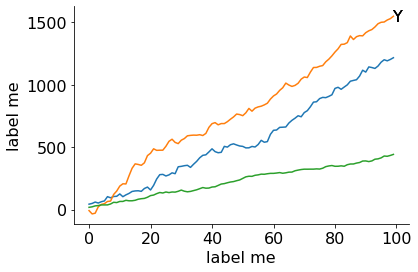

In [5]:
def labeled_lines(df, xlabel="label me", ylabel="label me"):
    ax = df.plot.line(legend=False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    last_x = df.index[-1]
    for i in range(len(df.columns)):
        last_y = df.iloc[-1, 1]
        line_name = df.columns[1]
        ax.text(last_x, last_y, line_name, va="center", ha="left")
    return ax

labeled_lines(df)

# Part 3

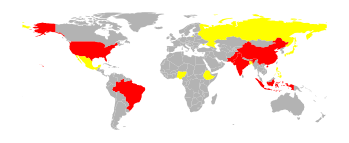

In [9]:
import geopandas

world_df = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world_df = world_df[world_df["continent"] != "Antarctica"]
world_df["color"] = "0.7"
world_df.loc[world_df["pop_est"] > 2e8, "color"] = "red"
world_df.loc[world_df["pop_est"] < 2e8, "color"] = "yellow"
world_df.loc[world_df["pop_est"] < 1e8, "color"] = "0.7"
world_df.plot(color=world_df["color"]).set_axis_off()